In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
import umap
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [4]:
df = pd.read_csv('churn_true.csv')
df

,Unnamed: 0,Phone_Number,Account_Length,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,...,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn,Cluster,PCA1,PCA2,Day_Eve_Charge_Ratio,Night_Intl_Charge_Ratio
0,8,329-6603,65,0,129.1,137,21.95,228.5,83,19.42,...,12.7,6,3.43,4,True,1,-2.335098,-0.681739,1.130278,2.740525
1,12,351-7269,161,0,332.9,67,56.59,317.8,97,27.01,...,5.4,9,1.46,4,True,1,-0.011146,0.556287,2.095150,4.952055
2,17,393-7984,77,0,62.4,89,10.61,169.9,121,14.44,...,5.7,6,1.54,5,True,1,-4.273185,-0.064077,0.734765,6.123377
3,26,360-1596,12,0,249.6,118,42.43,252.4,119,21.45,...,11.8,3,3.19,1,True,1,-0.473658,0.186126,1.978089,3.952978
4,39,398-1294,119,0,159.1,114,27.05,231.3,117,19.66,...,8.8,3,2.38,5,True,1,-2.859719,-0.742749,1.375890,2.705882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4148,33176,769-9777,98,0,268.8,82,28.22,286.2,222,22.88,...,22.8,2,8.22,2,True,0,1.123364,-1.177309,1.233392,1.092457
4149,33190,766-8785,26,0,229.6,28,89.08,208.2,208,22.28,...,20.8,2,2.92,0,True,0,-0.063786,-1.694523,3.998205,0.780822
4150,33192,797-7979,92,0,282.2,208,89.88,229.8,209,28.22,...,2.0,2,0.82,2,True,0,0.904715,4.463308,3.184975,25.390244
4151,33194,787-9998,66,0,262.8,92,28.22,280.0,68,29.88,...,20.6,8,2.86,2,True,1,0.484861,0.128087,0.944444,3.034965


In [5]:
# Ensure 'Churn' column is properly formatted
df['Churn'] = df['Churn'].astype(int)

In [6]:

# Select relevant numerical columns for clustering
numerical_cols = [
    'Account_Length', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 
    'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 
    'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls'
]

X = df[numerical_cols]

In [7]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Function for hierarchical clustering and visualization
def hierarchical_clustering_and_plot(X_reduced, method_name):
    # Perform hierarchical clustering
    linked = linkage(X_reduced, method='ward')
    
    # Plotting the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.title(f'Dendrogram for Hierarchical Clustering ({method_name})')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    plt.show()

    

In [15]:
# Assigning clusters
max_d = 150  # This distance threshold can be adjusted based on the dendrogram
df['Cluster'] = fcluster(linked, max_d, criterion='distance')

NameError: name 'linked' is not defined

In [ ]:
# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title(f'Customer Clusters Visualization using {method_name} + Hierarchical Clustering')
plt.xlabel(f'{method_name} Component 1')
plt.ylabel(f'{method_name} Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# 1. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
hierarchical_clustering_and_plot(X_pca, 'PCA')

In [ ]:

# 2. t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
hierarchical_clustering_and_plot(X_tsne, 't-SNE')

In [ ]:
# 3. Isomap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)
hierarchical_clustering_and_plot(X_isomap, 'Isomap')

In [ ]:
# 4. UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)
hierarchical_clustering_and_plot(X_umap, 'UMAP')

In [16]:
# Distance threshold for clustering (can be adjusted)
max_d = 150

# Dictionary to store the results
methods = {
    'PCA': PCA(n_components=2),
    't-SNE': TSNE(n_components=2, random_state=42),
    'Isomap': Isomap(n_components=2),
    'UMAP': umap.UMAP(n_components=2, random_state=42)
}


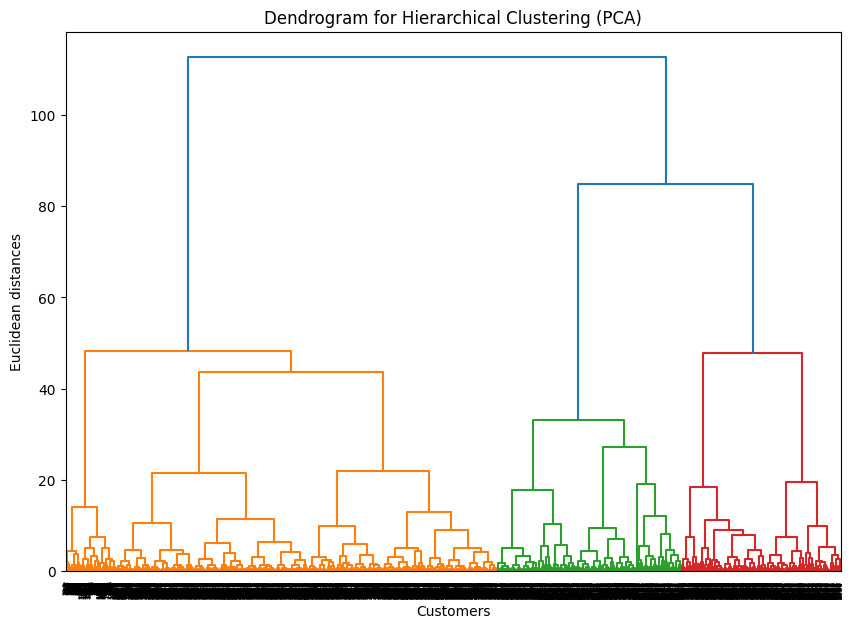

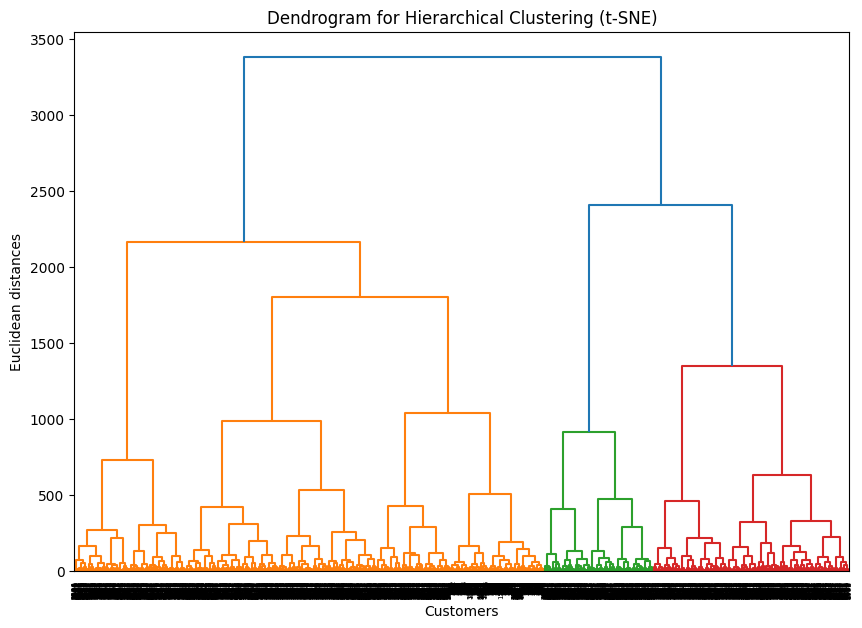

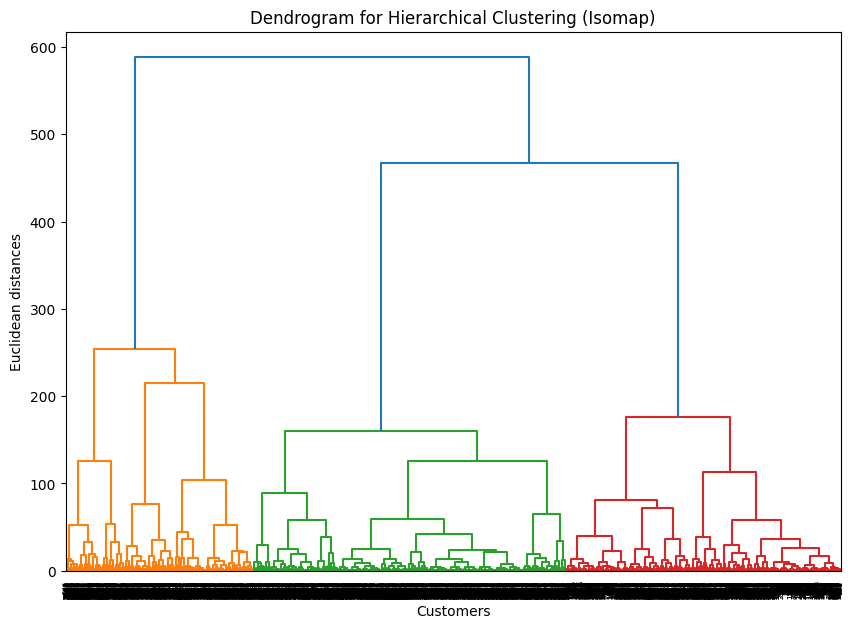

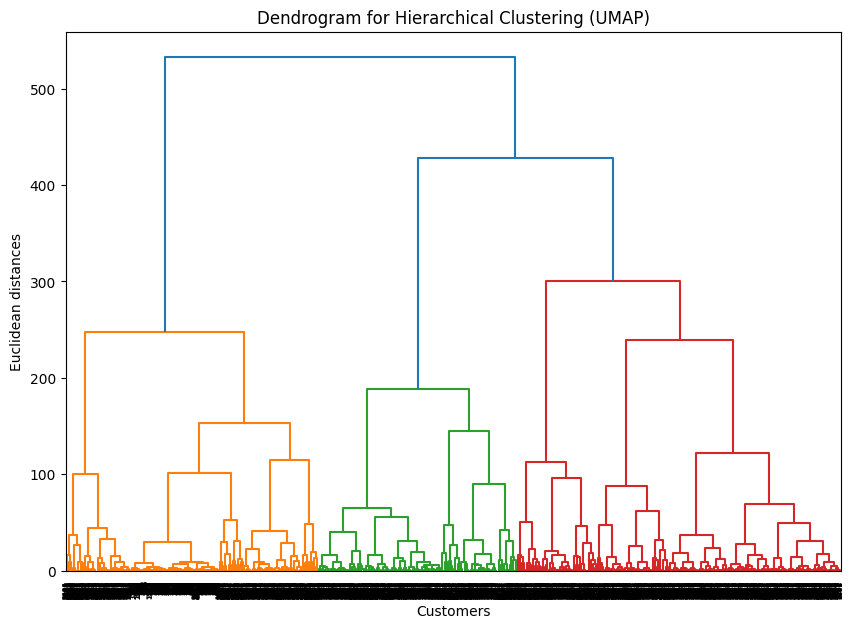

In [17]:
# Loop through each dimensionality reduction method
for name, method in methods.items():
    # Perform dimensionality reduction
    X_reduced = method.fit_transform(X_scaled)
    
    # Perform hierarchical clustering
    linked = linkage(X_reduced, method='ward')
    
    # Plot dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.title(f'Dendrogram for Hierarchical Clustering ({name})')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    plt.show()

In [ ]:
# Assign clusters based on the distance threshold
df['Cluster'] = fcluster(linked, max_d, criterion='distance')
    
    # Prepare columns for plotting
df[f'{name}1'] = X_reduced[:, 0]
df[f'{name}2'] = X_reduced[:, 1]

In [ ]:
 # Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=f'{name}1', y=f'{name}2', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title(f'Customer Clusters Visualization using {name} + Hierarchical Clustering')
plt.xlabel(f'{name} Component 1')
plt.ylabel(f'{name} Component 2')
plt.legend(title='Cluster')
plt.show()